Reading programming pearls. How do you compute fast anagrams?

In [3]:
def signature(word):
    "Computes the signature of a word."
    return "".join(sorted(word))

In [4]:
signature("deposit")

'deiopst'

In [5]:
signature("dopiest")

'deiopst'

In [6]:
signature("posited")

'deiopst'

In [7]:
signature("topside")

'deiopst'

Let's tackle the problem that is stated in the programming pearls column: let's get a big file full of words and find all anagram groups inside it.

We'll download the big file of words from Peter Norvig's website.

In [9]:
import requests

In [10]:
r = requests.get('http://norvig.com/ngrams/count_1w.txt')

In [11]:
r

<Response [200]>

In [12]:
len(r.text)

4956241

In [13]:
r.text[:100]

'the\t23135851162\nof\t13151942776\nand\t12997637966\nto\t12136980858\na\t9081174698\nin\t8469404971\nfor\t5933321'

In [14]:
words = [line.split('\t')[0] for line in r.text.split('\n')]

In [15]:
len(words)

333334

In [16]:
words[:10]

['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that']

In [17]:
signatures = [signature(word) for word in words]

Now, let's build a dictionary using the signatures:

In [24]:
anagrams = {}
for word in words:
    s = signature(word)
    if s in anagrams:
        anagrams[s].append(word)
    else:
        anagrams[s] = [word]

In [35]:
sorted(anagrams.keys(), key=lambda k: len(anagrams[k]), reverse=True)[:120]

['aerst',
 'acrs',
 'abcs',
 'acis',
 'acms',
 'acps',
 'acst',
 'aips',
 'cips',
 'aces',
 'ahins',
 'aeprs',
 'apst',
 'adir',
 'adnor',
 'ainst',
 'acir',
 'aeps',
 'aims',
 'aist',
 'acip',
 'acds',
 'cops',
 'airst',
 'ails',
 'ains',
 'acmr',
 'arst',
 'aorst',
 'gglloo',
 'eorst',
 'ceis',
 'einst',
 'aest',
 'aeimnr',
 'amps',
 'acmp',
 'eist',
 'cers',
 'adis',
 'amst',
 'aens',
 'aelst',
 'acls',
 'eimst',
 'cims',
 'acpr',
 'aems',
 'cmps',
 'ceps',
 'imst',
 'acert',
 'acfs',
 'cest',
 'acpt',
 'aemns',
 'abis',
 'eims',
 'acdp',
 'acim',
 'adenr',
 'acep',
 'acehrs',
 'eops',
 'acns',
 'cios',
 'aers',
 'eips',
 'aels',
 'airs',
 'aenrt',
 'aenrs',
 'adem',
 'acrt',
 'cdis',
 'aelps',
 'aegnr',
 'alps',
 'prst',
 'cems',
 'eirst',
 'aeiln',
 'amsu',
 'eggloo',
 'acenr',
 'acin',
 'imps',
 'afis',
 'aeirs',
 'acdi',
 'adin',
 'ades',
 'airt',
 'dein',
 'cprs',
 'acil',
 'enort',
 'aert',
 'aemnor',
 'cpst',
 'aelm',
 'aipr',
 'acet',
 'cdps',
 'acel',
 'afir',
 'eirt',
 'in

In [36]:
anagrams['adnor']

['radon',
 'doran',
 'adorn',
 'ronda',
 'norad',
 'andro',
 'daron',
 'andor',
 'rodan',
 'rando',
 'nardo',
 'dorna',
 'drano',
 'narod',
 'nador',
 'donar',
 'ondra',
 'adron',
 'ardon',
 'drona',
 'arond']

Finally, let's do a little scatter plot of lenght of word vs number of anagrams. Let's use pandas for that.

In [37]:
import pandas as pd

In [39]:
df = 

In [41]:
df.shape

(243439,)

In [45]:
df = pd.DataFrame(pd.Series(anagrams),
            columns=['words'])

In [46]:
df['signature_length'] = [len(item) for item in df.index]

In [47]:
df['word_count'] = [len(item) for item in df.words]

In [49]:
df

,words,signature_length,word_count
,[],0,1
a,[a],1,1
aa,[aa],2,1
aaa,[aaa],3,1
aaaa,[aaaa],4,1
aaaaaaaaaahhhhhhhhhh,[hahahahahahahahahaha],20,1
aaaaaaaabbllmm,[alabamaalabama],14,1
aaaaaaaaddeeeeggggillmnnoprtuuuu,[grenadaguadeloupeguatemalaguiana],32,1
aaaaaaaahhhhhhhh,[hahahahahahahaha],16,1
aaaaaaahhhhhhh,[hahahahahahaha],14,1


In [50]:
%matplotlib inline

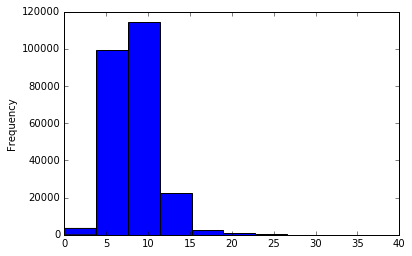

In [68]:
df.signature_length.plot.hist()

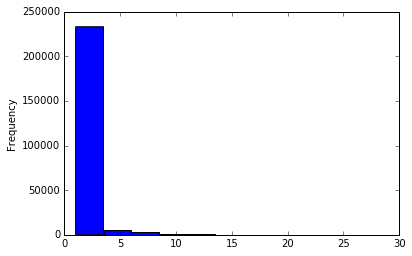

In [69]:
df.word_count.plot.hist()

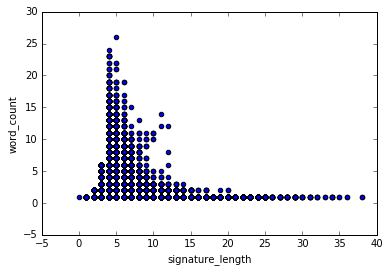

In [53]:
df.plot.scatter(x='signature_length', y='word_count')

Let's conclude: 

- long words have few anagrams
- too short words have few anagrams
- words between 4 and 12 letters have a couple of anagrams